In [1]:
### 벅스 차트 클롤링 하기...

from selenium import webdriver   # 세션이 유지되어야하는 경우 셀리늄을 사용한다. 
driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")

url = "https://music.bugs.co.kr/chart" 
driver.get(url)


from bs4 import BeautifulSoup 
html = driver.page_source 
soup = BeautifulSoup(html,"html.parser")


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_62835/4131909618.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")


In [103]:
# 곡 정보 얻기 
songs = soup.select("table.list > tbody > tr") 
songs 


[<tr albumid="20468120" artistid="80041466" multiartist="N" mvid="608363" rowtype="track" trackid="32542643">
 <input name="_isStream" type="hidden" value="32542643"/>
 <input name="_isDown" type="hidden" value="32542643"/>
 <td class="check"><input buyminquality="T" disc_id="1" name="check" title="팡파레" type="checkbox" value="32542643"/></td>
 <td>
 <div class="ranking">
 <strong>1</strong>
 <p class="change none"><em>0</em><span>변동없음</span></p>
 </div>
 </td>
 <td>
 <a class="thumbnail" href="https://music.bugs.co.kr/album/20468120?wl_ref=list_tr_07_chart" onclick="
 ">
 <span class="mask"></span>
 <img alt="Season Note 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/204681/20468120.jpg?version=20220518014558.0"/>
 </a>
 </td>
 <td>
 <a class="trackInfo" href="https://music.bugs.co.kr/track/32542643?wl_ref=list_tr_08_chart" onclick="
 ">곡정보</a>
 </td>
 <th scope="row">
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href

In [102]:
# 곡정보 확인
song = songs[0] 


In [104]:
# 곡제목 찾기
title = song.select('p.title > a')[0].text
title

'팡파레'

In [105]:
# 가수 이름 찾기 
singer = song.select("p.artist > a")[0].text 
singer 

'다비치'

In [100]:
songs = soup.select("table.byChart > tbody > tr")

for song in songs:
  title = song.select("p.title > a")[0].text
  singer = song.select("p.artist > a")[0].text
  print(title,singer,sep=" - ")
  

팡파레 - 다비치
천왕성 - 이수영
LOVE DIVE - IVE (아이브)
That That (prod. & feat. SUGA of BTS) - 싸이 (PSY)
TOMBOY - (여자)아이들
FEARLESS - LE SSERAFIM (르세라핌)
사랑인가 봐 - 멜로망스(MeloMance)
Happy Song - 멜로망스(MeloMance)
초록을거머쥔우리는 - 잔나비
봄여름가을겨울 (Still Life) - BIGBANG (빅뱅)
YOU AND I - WSG워너비 조별경연 (대청봉)
나의 X에게 - 경서
정이라고 하자 (Feat. 10CM) - BIG Naughty (서동현)
Feel My Rhythm - Red Velvet (레드벨벳)
감동이야 (feat. 성시경) - 싸이 (PSY)
ZOOM - 제시(Jessi)
왜 이제와서야 (Why) - 황치열
That's Hilarious - Charlie Puth(찰리 푸스)
둘이서 떠나요 - 다비치
LOVE me - BE'O (비오)
안녕이란 말 - 정승환
MY BAG - (여자)아이들
Celeb - 싸이 (PSY)
GANADARA (Feat. 아이유) - 박재범
With you - 지민
INVU - 태연 (TAEYEON)
봄 to 러브 - 10CM
ELEVEN - IVE (아이브)
모래성 - 다비치
Seoul - 볼빨간사춘기
내 곁에 - 태연 (TAEYEON)
듣고 싶을까 - MSG워너비(M.O.M)
초대 - 멜로망스(MeloMance)
여름가을겨울  봄. - 잔나비
알아가려 해 - 이수영
strawberry moon - 아이유(IU)
Drive - 미연 ((여자)아이들)
신호등 - 이무진
다정히 내 이름을 부르면 - 경서예지
RUN2U - STAYC(스테이씨)
사건의 지평선 - 윤하(Younha/ユンナ)
이제는 (feat. 화사) - 싸이 (PSY)
취중고백 - 김민석 (멜로망스)
작은 빗방울이 네 손끝에 - 이수영
마지막 너의 인사 - 헤이즈(Heize)
사월에게 - 이수영
존재만으로 - 원슈타인
Stron

In [93]:
### 반복문 사요하여 song_data 저장
song_data = []
rank = 1 
for song in songs:
  title = song.select("p.title > a")[0].text
  singer = song.select("p.artist > a")[0].text
  song_data.append(['Bugs',rank,title,singer])
  rank = rank + 1
song_data[0]

['Bugs', 1, '팡파레', '다비치']

In [96]:
import pandas as pd

columns = ['플랫폼','순위','제목','가수']
pd_df = pd.DataFrame(song_data,columns=columns)
pd_df.head()

,플랫폼,순위,제목,가수
0,Bugs,1,팡파레,다비치
1,Bugs,2,천왕성,이수영
2,Bugs,3,LOVE DIVE,IVE (아이브)
3,Bugs,4,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
4,Bugs,5,TOMBOY,(여자)아이들


In [97]:
## 엑셀에 저장
pd_df.to_excel("data/bugs.xlsx",index=False) 

In [106]:
### 지니 차트 크롤링 하기



from selenium import webdriver   # 세션이 유지되어야하는 경우 셀리늄을 사용한다. 
driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")

url ="https://www.genie.co.kr/chart/top200"
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html,"html.parser")
soup 


/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_62835/2382489827.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")


<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" dir="ltr" lang="ko" style=""><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!--[if lte IE 6]><html dir="ltr" class="no-js ie6"><![endif]-->
<!--[if lte IE 7]><html dir="ltr" class="no-js ie7"><![endif]-->
<!--[if IE 8]><html dir="ltr" class="no-js ie8"><![endif]-->
<!--[if IE 9]><html dir="ltr" class="no-js ie9"><![endif]-->
<!--[if (gte IE 10)|!(IE)]><!--><!--<![endif]-->
<title>지니차트&gt;실시간 - 지니</title>
<meta charset="utf-8"/>
<meta content="d17289f97c7f294985a9b0eb3649a45ac5ceeee2" name="naver-site-verificatio

In [118]:
### 곡 정보 찾기

songs = soup.select("table > tbody > tr")
len(songs) 

song = songs[0]


In [119]:
title = song.select("a.title")[0].text 
title.strip()


'That That (Prod. & Feat. SUGA of BTS)'

In [125]:
singer = song.select("a.artist")[0].text
singer

'싸이 (Psy)'

In [133]:
songs = soup.select("table > tbody > tr") 

for song in songs:
  title = song.select("a.title")[0].text.strip()
  title = title.replace("19금","").strip()
  singer = song.select("a.artist")[0].text
  print(title,singer,sep = " - ") 




That That (Prod. & Feat. SUGA of BTS) - 싸이 (Psy)
TOMBOY - (여자)아이들
LOVE DIVE - IVE (아이브)
봄여름가을겨울 (Still Life) - BIGBANG (빅뱅)
사랑은 늘 도망가 - 임영웅
사랑인가 봐 - 멜로망스 (MeloMance)
우리들의 블루스 - 임영웅
나의 X에게 - 경서
Feel My Rhythm - Red Velvet (레드벨벳)
다시 만날 수 있을까 - 임영웅
취중고백 - 김민석 (멜로망스)
LOVE me - BE'O (비오)
ZOOM - 제시
GANADARA (Feat. 아이유) - 박재범
신호등 - 이무진
이제 나만 믿어요 - 임영웅
팡파레 - 다비치
무지개 - 임영웅
다정히 내 이름을 부르면 - 경서예지 & 전건호
아버지 - 임영웅
Celeb - 싸이 (Psy)
듣고 싶을까 - MSG워너비 (M.O.M)
A bientot - 임영웅
손이 참 곱던 그대 - 임영웅
사랑해 진짜 - 임영웅
사랑역 - 임영웅
FEARLESS - LE SSERAFIM (르세라핌)
INVU - 태연 (TAEYEON)
연애편지 - 임영웅
보금자리 - 임영웅
사랑해요 그대를 - 임영웅
인생찬가 - 임영웅
Stay - The Kid LAROI & Justin Bieber
MY BAG - (여자)아이들
정이라고 하자 (Feat. 10CM) - BIG Naughty (서동현)
ELEVEN - IVE (아이브)
언제나 사랑해 - 케이시 (Kassy)
Weekend - 태연 (TAEYEON)
감동이야 (Feat. 성시경) - 싸이 (Psy)
내 손을 잡아 - 아이유 (IU)
회전목마 (Feat. Zion.T & 원슈타인) (Prod. by Slom) - sokodomo
abcdefu - GAYLE
너의 모든 순간 - 성시경
Counting Stars (Feat. Beenzino) - BE'O (비오)
Stronger (What Doesn't Kill You) - Kelly Clarkson
strawberry moon 

In [134]:
song_data1 = []
rank = 1 
for song in songs:
  title = song.select("a.title")[0].text.strip()
  title = title.replace("19금","").strip()
  singer = song.select("a.artist")[0].text
  song_data1.append(['Genie',rank,title,singer])
  rank = rank + 1 


In [135]:

cl = ["플랫폼","순위","제목","가수"]
df_pd = pd.DataFrame(song_data1,columns=cl)
df_pd.to_excel("data/ginie.xlsx",index=False)  

In [136]:
### Excel_Merge

excel_name = ["data/bugs.xlsx","data/ginie.xlsx","data/melon.xlsx"] 

appended_data = pd.DataFrame() 

for name in excel_name:
  pd_df = pd.read_excel(name)
  appended_data = appended_data.append(pd_df) 
  

/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_62835/4046574787.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_62835/4046574787.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)
/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_62835/4046574787.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = appended_data.append(pd_df)


In [146]:
appended_data.to_excel("data/total_chart.xlsx",index=False)         


total = pd.read_excel("data/total_chart.xlsx") 
total

,플랫폼,순위,제목,가수
0,Bugs,1,팡파레,다비치
1,Bugs,2,천왕성,이수영
2,Bugs,3,LOVE DIVE,IVE (아이브)
3,Bugs,4,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
4,Bugs,5,TOMBOY,(여자)아이들
...,...,...,...,...
245,Melon,96,Starlight,태일 (TAEIL)
246,Melon,97,Good Boy Gone Bad,투모로우바이투게더
247,Melon,98,버퍼링 (Glitch Mode),NCT DREAM
248,Melon,99,미친 것처럼,V.O.S


In [27]:
### 유튜브 랭킹 크롤링

from selenium import webdriver   # 세션이 유지되어야하는 경우 셀리늄을 사용한다. 
import time
from bs4 import BeautifulSoup 
import pandas as pd 

driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")

url1 ="http://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url1)

html = driver.page_source
soup = BeautifulSoup(html,"html.parser")



/var/folders/bh/fc9kz9jd629610b3rs258vlw0000gn/T/ipykernel_68176/4016489872.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/yunbeen/Downloads/chromedriver")


In [28]:
channel_list = soup.select("form > table > tbody > tr")
len(channel_list)

100

In [13]:
channel = channel_list[0]

category = channel.select("p.category")[0].text.strip()
category




'[음악/댄스/가수]'

In [14]:
title = channel.select("h1 > a")[0].text.strip() 
len(title)
title

'BLACKPINK'

In [21]:
subscriber = channel.select(".subscriber_cnt")[0].text
subscriber 
view = channel.select(".view_cnt")[0].text
video = channel.select(".video_cnt")[0].text
view 
video

'394개'

In [29]:

for channel in channel_list:
  title = channel.select("h1 > a")[0].text.strip() 
  category = channel.select("p.category")[0].text.strip()
  subscriber = channel.select(".subscriber_cnt")[0].text
  view = channel.select(".view_cnt")[0].text
  video = channel.select(".video_cnt")[0].text 
  print(title,category,subscriber,view,video,sep="|") 


BLACKPINK|[음악/댄스/가수]|7420만|236억7615만|394개
BANGTANTV|[음악/댄스/가수]|6630만|161억5062만|1,694개
HYBE LABELS|[음악/댄스/가수]|6550만|226억3812만|866개
SMTOWN|[음악/댄스/가수]|3030만|244억9471만|3,904개
Boram Tube Vlog [보람튜브 브이로그]|[키즈/어린이]|2650만|110억5288만|223개
1MILLION Dance Studio|[음악/댄스/가수]|2520만|72억6400만|3,928개
JYP Entertainment|[음악/댄스/가수]|2450만|164억0960만|1,471개
1theK (원더케이)|[음악/댄스/가수]|2410만|222억0972만|16,504개
Mnet K-POP|[음악/댄스/가수]|1950만|149억7540만|28,223개
KBS WORLD TV|[TV/방송]|1780만|135억7124만|56,979개
JFlaMusic|[음악/댄스/가수]|1760만|36억1166만|282개
officialpsy|[음악/댄스/가수]|1680만|94억1431만|112개
Jane ASMR 제인|[음식/요리/레시피]|1650만|62억0744만|1,462개
BIGBANG|[음악/댄스/가수]|1470만|72억1270만|776개
TWICE|[음악/댄스/가수]|1370만|33억6373만|790개
Hongyu ASMR 홍유|[음식/요리/레시피]|1260만|38억4789만|479개
Kendrick Lamar|[미분류]|1080만|44억9105만|19개
TheWeekndVEVO|[미분류]|1060만|145억6351만|132개
Nao FunFun|[키즈/어린이]|1060만|459만|54개
핑크퐁 (인기 동요・동화)|[키즈/어린이]|1060만|64억7366만|2,606개
Stone Music Entertainment|[음악/댄스/가수]|1040만|87억4643만|8,748개
DuDuPopTOY|[키즈/어린이]|1040만|47억3839만|2,113개
Toymong 

In [30]:
### page별로 100 개씩 노출하고 있음
page = 1
url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
print(url) 



https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [34]:
### 유투브 랭킹 화면의 여러 페이지 크롤링
result = []
for page in range(1,11): 
  url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
  driver.get(url)
  time.sleep(2) 
  html = driver.page_source
  soup = BeautifulSoup(html,"html.parser")
  channel_list = soup.select("form > table > tbody > tr")
  for channel in channel_list:
    title = channel.select("h1 > a")[0].text.strip() 
    category = channel.select("p.category")[0].text.strip()
    subscriber = channel.select(".subscriber_cnt")[0].text
    view = channel.select(".view_cnt")[0].text
    video = channel.select(".video_cnt")[0].text 
    data = [title,category,subscriber,view,video]
    result.append(data)
    

In [39]:
columns = ["title","category","subscriber","view","video"]
df = pd.DataFrame(result,columns=columns)
df.to_excel("data/youtube_rank.xlsx",index=False) 

In [71]:
import matplotlib.pyplot as plt      
from matplotlib import rc       
import platform  ## 플랫폼 관련 라이브러리, 각각의 플랫폼에 따른 폰트 설정을 위해서

# if platform.system()== "Windows":
#   path = "c:windows/Fonts/malgun.ttf"
#   font_name = font_manager.FontProperties(fname=path).get_name()
#   rc.('font',family=font_name)
# elif platform.system() == "Darwin":
#   rc('font',family='AppleGothic')
# else:
#   print("Check your OS System") 


## 맥북용 
%matplotlib inline         
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 



In [72]:
df = pd.read_excel("data/youtube_rank.xlsx")
df.head() 

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7420만,236억7615만,394개
1,BANGTANTV,[음악/댄스/가수],6630만,161억5062만,"1,694개"
2,HYBE LABELS,[음악/댄스/가수],6550만,226억3812만,866개
3,SMTOWN,[음악/댄스/가수],3030만,244억9471만,"3,904개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [73]:

df['replace_subscriber'] = df['subscriber'].str.replace('만',"0000")  



In [74]:
df['replace_subscriber'] = df['replace_subscriber'].astype('int64')  

In [75]:
# 카테고리별 구독자수, 채널수 피봇 테이블 생성

pivot_df = df.pivot_table(index='category',values='replace_subscriber',aggfunc=['sum','count'])
pivot_df.head() 

,sum,count
,replace_subscriber,replace_subscriber
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252940000,139
[게임],71630000,67
[교육/강의],25890000,21


In [76]:
### pivot_df의 데이터 프레임 컬럼명 변경  
pivot_df.columns = ['subscriber_sum','category_count'] 
pivot_df.head()


,subscriber_sum,category_count
category,,
[BJ/인물/연예인],93960000,62
[IT/기술/컴퓨터],9000000,8
[TV/방송],252940000,139
[게임],71630000,67
[교육/강의],25890000,21


In [77]:
# 인덱스 초기화 
pivot_df = pivot_df.reset_index() 
pivot_df.head() 

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],93960000,62
1,[IT/기술/컴퓨터],9000000,8
2,[TV/방송],252940000,139
3,[게임],71630000,67
4,[교육/강의],25890000,21


In [78]:
### 데이터 프레임 내림차순 정렬 
pivot_df = pivot_df.sort_values(by='subscriber_sum',ascending=False) 
pivot_df 

,category,subscriber_sum,category_count
12,[음악/댄스/가수],753000000,168
17,[키즈/어린이],273190000,88
2,[TV/방송],252940000,139
11,[음식/요리/레시피],198420000,81
7,[미분류],159570000,148
0,[BJ/인물/연예인],93960000,62
6,[뉴스/정치/사회],87600000,58
3,[게임],71630000,67
15,[취미/라이프],49320000,35
18,[패션/미용],42910000,40


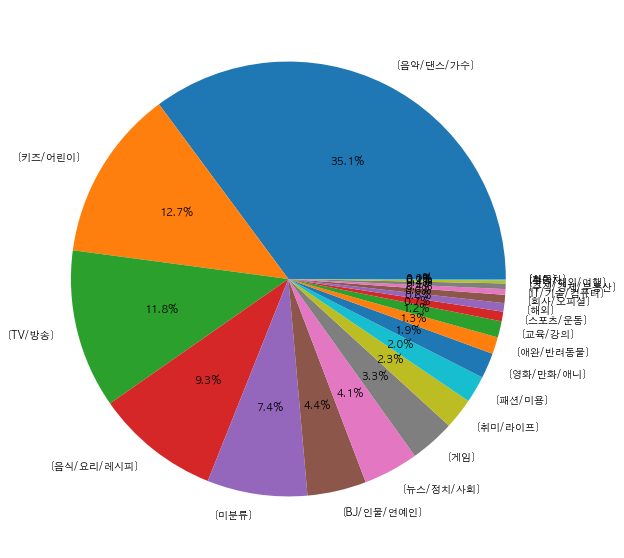

In [83]:
## 카테고리별 구독자수 시각화 
plt.figure(figsize= (30,10)) 

plt.pie(pivot_df['subscriber_sum'],labels=pivot_df['category'],autopct="%1.1f%%")

plt.show() 

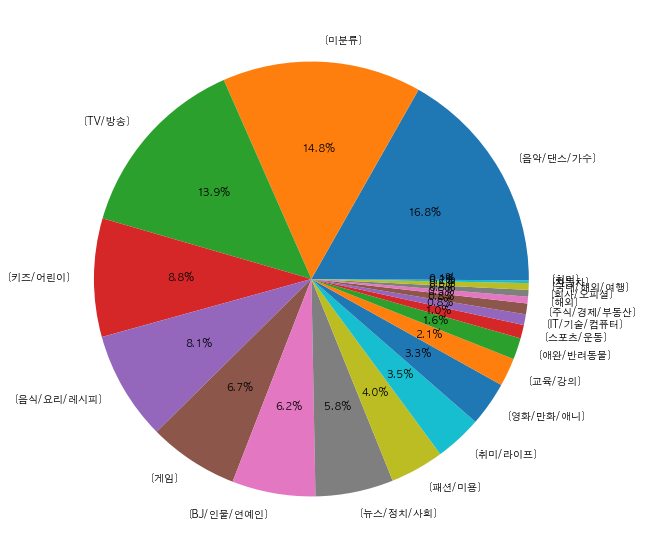

In [89]:
pivot_df = pivot_df.sort_values(by='category_count',ascending=False)
pivot_df.head() 

plt.figure(figsize= (30,10)) 
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct="%1.1f%%")
plt.show()          
